In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# data segmentation according to types

data = pd.read_csv('Scraper/open-llm-leaderboard.csv') # read the full leaderboard
grouped = data.groupby('Type')
dataframes = {name: group for name, group in grouped} # create seperate dfs for each type of models
print(dataframes.keys())

# four type of models
RL_tuned_models = dataframes['RL-tuned']
fine_tuned_models = dataframes['fine-tuned']
instruction_tuned_models = dataframes['instruction-tuned']
pretrained_models = dataframes['pretrained']

print(len(RL_tuned_models), len(fine_tuned_models), len(instruction_tuned_models), len(pretrained_models)) # number of models of each type
print(len(data)-sum([len(RL_tuned_models), len(fine_tuned_models), len(instruction_tuned_models), len(pretrained_models)])) # some models have NaN types, 120
modelsets = []
modelsets.extend([RL_tuned_models, fine_tuned_models, instruction_tuned_models, pretrained_models, data])

dict_keys(['RL-tuned', 'fine-tuned', 'instruction-tuned', 'pretrained'])
17 1234 292 207
120


In [3]:
# visualization func
def visual(models, name):
    # Extract the values from the second dimension
    sizes = models['#Params (B)'].values

    # Plot the histogram
    plt.hist(sizes, bins='auto')  # 'auto' will automatically determine the number of bins
    plt.xlabel('#Params (B)')
    plt.ylabel('Frequency')
    plt.title(f'{name}: Distribution of #Params (B)')
    plt.show()

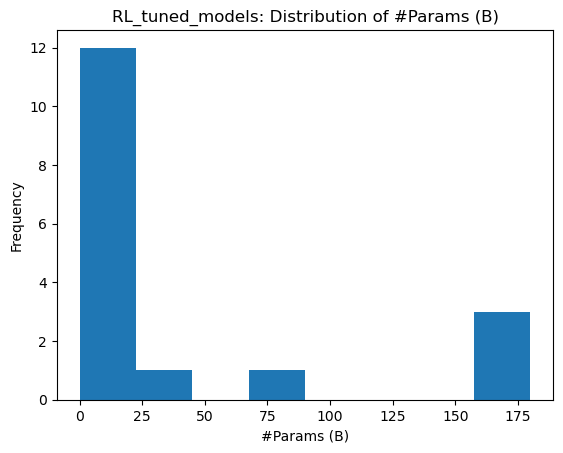

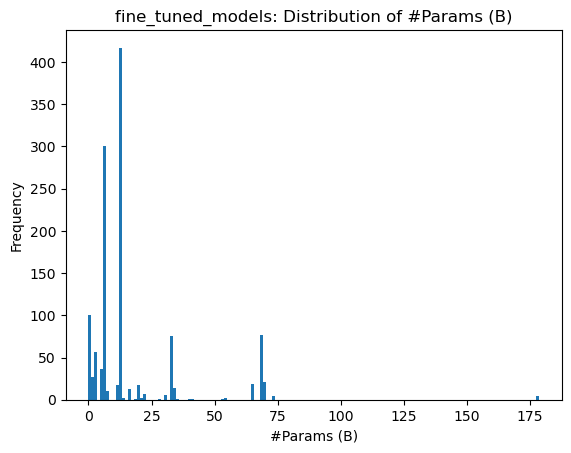

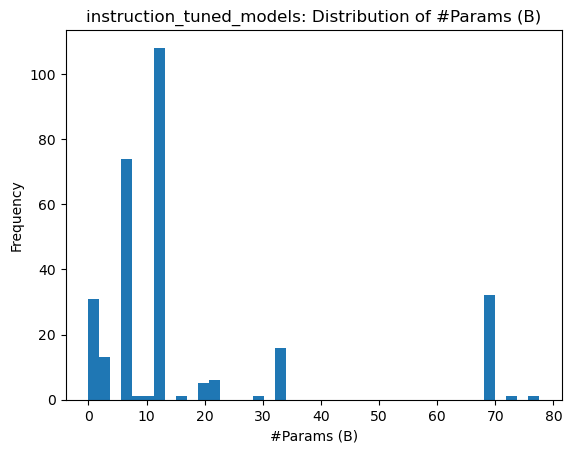

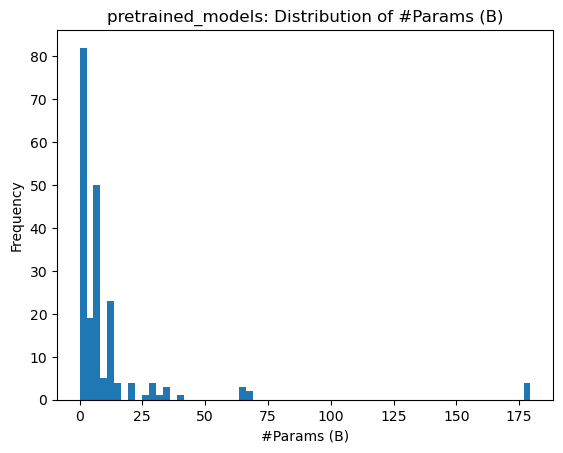

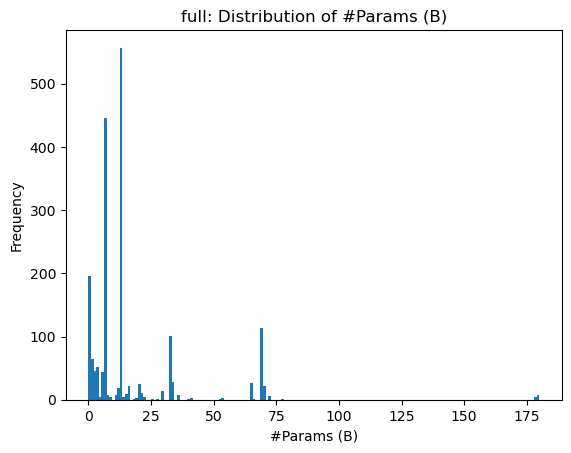

In [4]:
# visualize the distribution of model sizes
modelset_names = ["RL_tuned_models", "fine_tuned_models", "instruction_tuned_models", "pretrained_models", "full"]
for i, models in enumerate(modelsets):
    visual(models, modelset_names[i])

In [5]:
seperation = [1, 1.5, 3, 7, 13, 35, 60, 70] # model size ranges
# finding best model within each size range
def find_best_model(models):
    best_model_names = set()
    for i in range(len(seperation)+1):
        low = seperation[i-1] if i != 0 else 0
        high = seperation[i] if i != len(seperation) else None
        sub_models = models[models['#Params (B)'] >= low]
        if high: sub_models = sub_models[sub_models['#Params (B)'] < high] # if high is not None
        if len(sub_models) == 0: continue # skip if there are no models within this size range
        max_score_index = sub_models['Average ⬆️'].idxmax()
        print(f'({low},{high})', sub_models.loc[max_score_index]["Model"])
        best_model_names.add(((low, high), sub_models.loc[max_score_index]["Model"]))
    return best_model_names

In [6]:
# finding and printing best models
best_models = []
for i, models in enumerate(modelsets):
    print(f'{modelset_names[i]}:')
    best_models.append(find_best_model(models))

RL_tuned_models:
(0,1) Locutusque/gpt2-large-conversational
(3,7) meta-llama/Llama-2-7b-chat-hf
(7,13) xxyyy123/mc_data_30k_from_platpus_orca_7b_10k_v1_lora_qkvo_rank14_v2
(13,35) Yhyu13/oasst-rlhf-2-llama-30b-7k-steps-hf
(60,70) meta-llama/Llama-2-70b-chat-hf
(70,None) tiiuae/falcon-180B-chat
fine_tuned_models:
(0,1) lloorree/jfdslijsijdgis
(1,1.5) AA051610/T1B
(1.5,3) Fredithefish/RedPajama-INCITE-Chat-3B-Instruction-Tuning-with-GPT-4
(3,7) oh-yeontaek/llama-2-7B-LoRA-assemble
(7,13) Undi95/Mistral-11B-TestBench11
(13,35) ajibawa-2023/scarlett-33b
(35,60) dfurman/falcon-40b-openassistant-peft
(60,70) ValiantLabs/ShiningValiant
(70,None) adonlee/LLaMA_2_70B_LoRA
instruction_tuned_models:
(0,1) Weyaxi/llama-2-alpacagpt4-1000step
(1,1.5) lgaalves/tinyllama-1.1b-chat-v0.3_platypus
(1.5,3) RWKV/rwkv-raven-3b
(3,7) pankajmathur/orca_mini_v3_7b
(7,13) ehartford/dolphin-2.1-mistral-7b
(13,35) Weyaxi/Luban-Marcoroni-13B
(60,70) budecosystem/genz-70b
(70,None) TheBloke/Genz-70b-GPTQ
pretrained

In [7]:
# create a set to filter out duplicates
models = set((*best_models[0], *best_models[1], *best_models[2], *best_models[3], *best_models[4]))
for model in sorted(models, key=lambda x: x[0][0]):
    print(model[0],model[1]) # print out sorted distinct model list

(0, 1) AtomEchoAI/AtomGPT_56k
(0, 1) Weyaxi/llama-2-alpacagpt4-1000step
(0, 1) lloorree/jfdslijsijdgis
(0, 1) Locutusque/gpt2-large-conversational
(1, 1.5) tiiuae/falcon-rw-1b
(1, 1.5) AA051610/T1B
(1, 1.5) lgaalves/tinyllama-1.1b-chat-v0.3_platypus
(1.5, 3) Fredithefish/RedPajama-INCITE-Chat-3B-Instruction-Tuning-with-GPT-4
(1.5, 3) stabilityai/stablelm-3b-4e1t
(1.5, 3) RWKV/rwkv-raven-3b
(3, 7) pankajmathur/orca_mini_v3_7b
(3, 7) oh-yeontaek/llama-2-7B-LoRA-assemble
(3, 7) meta-llama/Llama-2-7b-hf
(3, 7) meta-llama/Llama-2-7b-chat-hf
(7, 13) kittn/mistral-7B-v0.1-hf
(7, 13) Undi95/Mistral-11B-TestBench11
(7, 13) xxyyy123/mc_data_30k_from_platpus_orca_7b_10k_v1_lora_qkvo_rank14_v2
(7, 13) ehartford/dolphin-2.1-mistral-7b
(13, 35) ehartford/samantha-1.1-llama-33b
(13, 35) Yhyu13/oasst-rlhf-2-llama-30b-7k-steps-hf
(13, 35) Weyaxi/Luban-Marcoroni-13B
(13, 35) internlm/internlm-20b
(13, 35) ajibawa-2023/scarlett-33b
(35, 60) tiiuae/falcon-40b
(35, 60) dfurman/falcon-40b-openassistant-peft